In [1]:
# Importing the Necessary Libraries 
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model
from google.colab import drive
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# Connecting to Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the Weights of the CNN Model with FC Layers 
network = load_model('/content/drive/MyDrive/ChestVGG_SGD.h5')

In [4]:
# Checking the Layer We Want to Use (Flattening Layer)
network.layers[41].output

<KerasTensor: shape=(None, 50176) dtype=float32 (created by layer 'flatten')>

In [5]:
# Loading the CNN Model with Layer 41 (Flattening Layer) 
model = Model(inputs=network.input, outputs=network.layers[41].output)

In [6]:
# Defining the Training and Test Path
train_path = '/content/drive/MyDrive/Dataset/train'
test_path = '/content/drive/MyDrive/Dataset/test'

In [7]:
# The Settings for Generating the Training Set  
train_datagen = ImageDataGenerator(
    rescale=1./255)

In [8]:
# The Settings for Generating the Test Set  
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [9]:
# Generating the Training Set 
train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = (224, 224),
                                                batch_size=1,
                                                shuffle=False,
                                                 class_mode = 'categorical')

Found 4686 images belonging to 2 classes.


In [10]:
# Generating the Test Set 
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            shuffle=False,
                                            batch_size=1,
                                            class_mode = 'categorical')

Found 1170 images belonging to 2 classes.


In [11]:
# Getting the Outputs of Layer 41 (Flattening Layer) as the Input of Machine Learning (ML) Classifiers for Training
features_train=model.predict(train_set, steps=4686, verbose=1)

4686/4686 [==============================] - 339s 71ms/step


In [12]:
# Getting the Outputs of Layer 41 (Flattening Layer) as the Input of Machine Learning (ML) Classifiers for Test
features_test=model.predict(test_set, steps=1170, verbose=1)

1170/1170 [==============================] - 82s 70ms/step


In [13]:
# Saving The Training Features To Google Drive For Further Use 
np.save("/content/drive/MyDrive/Features_Flattened.npy", features_train)

In [14]:
# Saving The Training Classes To Google Drive For Further Use
train_classes=train_set.classes
np.save("/content/drive/MyDrive/Classes.npy", train_classes)

In [15]:
# Creating Linear Support Vector Machine (SVM) Classifier
from sklearn.svm import LinearSVC
svc_linear=LinearSVC(C=1, dual=False, max_iter=6000)
model_svc_linear=svc_linear.fit(features_train, train_set.classes)

In [16]:
# Making Predictions Using Linear SVM Classifier
preds_svc_linear=model_svc_linear.predict(features_test)

0.9811965811965812

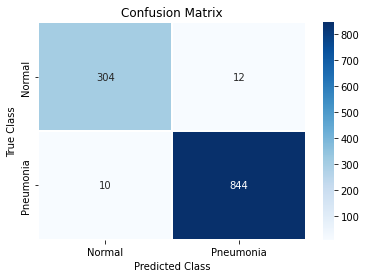

In [17]:
# Creating Confusion Matrix For Linear SVM Classifier
cf_matrix_svm_linear=confusion_matrix(test_set.classes, preds_svc_linear)
ax=plt.subplot()
sns.heatmap(cf_matrix_svm_linear, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(test_set.classes, preds_svc_linear)

In [18]:
# Creating Radial Basis Function (RBF) SVM Classifier
from sklearn import svm
svc_rbf = svm.SVC(C=1, kernel='rbf', max_iter=6000)
model_svc_rbf=svc_rbf.fit(features_train, train_set.classes)

In [19]:
# Making Predictions Using RBF-SVM Classifier
preds_svc_rbf=model_svc_rbf.predict(features_test)

0.9829059829059829

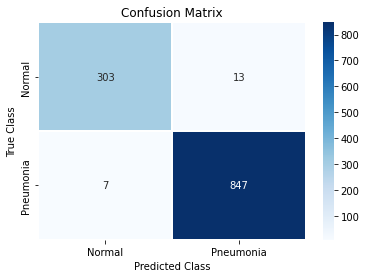

In [20]:
# Creating Confusion Matrix for RBF-SVM Classifier
cf_matrix_svm_rbf=confusion_matrix(test_set.classes, preds_svc_rbf)
ax=plt.subplot()
sns.heatmap(cf_matrix_svm_rbf, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(test_set.classes, preds_svc_rbf)

In [21]:
# Creating Polynomial SVM Classifier
svc_pol = svm.SVC(C=1, kernel='poly', max_iter=6000)
model_svc_pol=svc_pol.fit(features_train, train_set.classes)

In [22]:
# Making Predictions Using Polynomial SVM Classifier
preds_svc_pol=model_svc_pol.predict(features_test)

0.9829059829059829

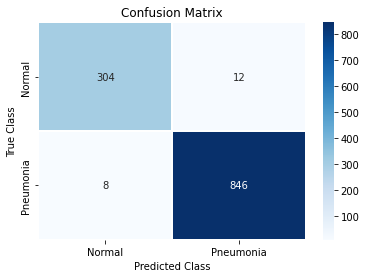

In [23]:
# Creating Confusion Matrix for Polynomial SVM Classifier
cf_matrix_svc_pol=confusion_matrix(test_set.classes, preds_svc_pol)
ax=plt.subplot()
sns.heatmap(cf_matrix_svc_pol, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(test_set.classes, preds_svc_pol)

In [24]:
# Creating Random Forest (RF) Classifier Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=0)
model_rf=random_forest.fit(features_train, train_set.classes)

In [25]:
# Making Predictions Using RF Classifier
preds_rf=model_rf.predict(features_test)

0.9769230769230769

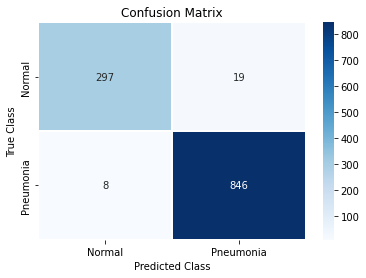

In [26]:
# Creating Confusion Matrix for RF Classifier
cf_matrix_rf=confusion_matrix(test_set.classes, preds_rf)
ax=plt.subplot()
sns.heatmap(cf_matrix_rf, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(test_set.classes, preds_rf)

In [27]:
# Creating Logistic Regression (LR) Classifier
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(max_iter=6000)
model_lr=logit.fit(features_train, train_set.classes)

In [28]:
# Making Predictions Using LR Classifier
preds_lr=model_lr.predict(features_test)

0.9803418803418803

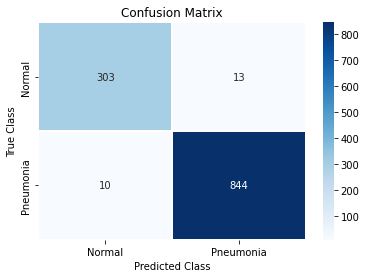

In [29]:
# Creating Confusion Matrix for LR Classifier
cf_matrix_lr=confusion_matrix(test_set.classes, preds_lr)
ax=plt.subplot()
sns.heatmap(cf_matrix_lr, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(test_set.classes, preds_lr)

In [30]:
# Creating K-Nearest Neighbors Classifier (The optimal K was calculated using different values in range [3,50])
from sklearn.neighbors import KNeighborsClassifier
knn_optimized=KNeighborsClassifier(n_neighbors=13).fit(features_train, train_set.classes)

In [31]:
# Making Predictions Using KNN Classifier
preds_knn=knn_optimized.predict(features_test)

0.9854700854700855

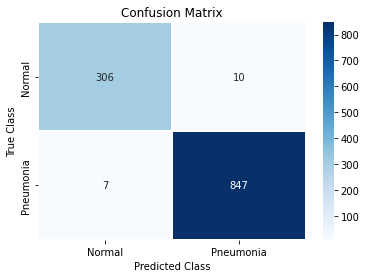

In [32]:
# Creating Confusion Matrix for KNN Classifier
cf_matrix_knn=confusion_matrix(test_set.classes, preds_knn)
ax=plt.subplot()
sns.heatmap(cf_matrix_knn, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(test_set.classes, preds_knn)

In [33]:
# Creating Gaussian Naive Bayes (NB) Classifier
from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB(priors=[0.5, 0.5])
model_nb=classifier_nb.fit(features_train, train_set.classes)

In [34]:
# Making Predictions Using Gaussian NB Classifier
preds_nb=model_nb.predict(features_test)

0.9247863247863248

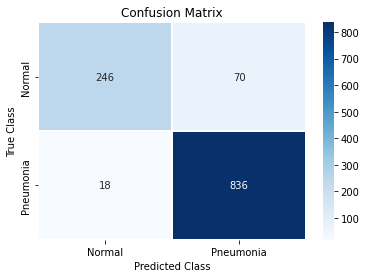

In [35]:
# Creating Confusion Matrix for Gaussian NB Classifier
cf_matrix_nb=confusion_matrix(test_set.classes, preds_nb)
ax=plt.subplot()
sns.heatmap(cf_matrix_nb, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia'])
accuracy_score(test_set.classes, preds_nb)

In [36]:
# Saving the KNN Classifier (The Model with the Highest Test Accuracy (98.55%))
Pkl_knn = "/content/drive/MyDrive/KNN.pkl"  
with open(Pkl_knn, 'wb') as file:  
    pickle.dump(knn_optimized, file)